# DATA WRANGLING: FINAL PROJECT
# Analyzing Crime Trends In New Zealand

#### **Antony Antoo (47228552), Issac Abrahm (65949089), Rosmin Raju (43700580), Vanitha viswanathan (15933289)**

## 1. Data Source

Three distinct datasets are used and they are: 
1. Crime Dataset - NZ.stat
2. Population Dataset - Stats nz
3. Justice Dataset - justice.gov.nz.

## 2. Packages required

In [1]:
library(readxl)
library(tidyr)
library(dplyr)
library(ggplot2)
library(tidyverse)
library(unpivotr)
library(tidyxl)
library(openxlsx)
library(janitor)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ lubridate 1.9.2     ✔ stringr   1.5.0
✔ purrr     1.0.1     ✔ tibble    3.2.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'unpivotr'


The following objects are masked from 'package:tidyr':

    pack, unpack



Attaching package: 'janitor'


The following objects are masked from 'package:stats':

    chisq.test, fisher.test




Package Requirement Explanation:
1. `readxl` :The datas are available in excel format, when dealing with Excel files as a data source this package serves the purpose.
2. `tidyr` : This package is used to split columns that had non-atomic level of information.
3. `dplyr` : Since tidy and tidyverse works in conjunction with dplyr, we will need dplyr for our analysis.
4. `ggplot2` : For well designed and visually pleasing visualizations that tell a story worth million words.
5. `tidyverse` : This package helps to work with and gain insights from your data.
6. `unpivotr` : Helps to transform pivot tables, which are common in spreadsheets, into a tidy format suitable for analysis.
7. `tidyxl` : Is used to preprocess Excel data.
8. `openxlsx` : Package provides functions to write Excel files in the xlsx format.
9. `janitor` : Package provides functions to renaming columns and other cleaning tasks. 

## 3. Data Preparation

### Dataset 1 - Crime data
#### **Step 1: Import dataset**

In [2]:
# data is stored in the "crime_data" data frame.
crime_data <- read_excel("Crime Data.xlsx")
head(crime_data, 10)

New names:
• `` -> `...1`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`
• `` -> `...16`
• `` -> `...17`
• `` -> `...18`
• `` -> `...19`
• `` -> `...20`
• `` -> `...21`
• `` -> `...22`
• `` -> `...23`
• `` -> `...24`


...1                                                                
1  Dataset: Annual Apprehensions for the latest Calendar Years (ANZSOC)
2  Age                                                                 
3  Gender                                                              
4  Ethnicity                                                           
5  Resolution                                                          
6  Year                                                                
7  Location                                                            
8  Northland District                                                  
9  NA                                                                  
10 NA                                                                  
   <?xml version="1.0"?><WebTableParameter xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xsd="http://www.w3.org/2001/XMLSchema" xmlns=""><DataTable Code="TABLECODE7407" HasMetadata="true"><Name LocaleIsoCode="en">Annual Apprehensions for the latest Calendar Years (ANZSOC)</Name><Dimension Code="LOCATION" HasMetadata="true" Display="labels"><Name LocaleIsoCode="en">Location</Name><Member Code="BG" HasOnlyUnitMetadata="false"><Name LocaleIsoCode="en">Northland District</Name></Member><Member Code="CX" HasOnlyUnitMetadata="false"><Name LocaleIsoCode="en">Waitemata District</Name></Member><Member Code="CJ" HasOnlyUnitMetadata="false"><Name LocaleIsoCode="en">Auckland District</Name></Member><Member Code="DA" HasOnlyUnitMetadata="false"><Name LocaleIsoCode="en">Counties/Manukau District</Name></Member><Member Code="DB" HasOnlyUnitMetadata="false"><Name LocaleIsoCode="en">Waikato District</Name></Member><Member Code="DC" HasOnlyUnitMetadata="false"><Name LocaleIsoCode="en">Bay Of Plenty District</Name></Member><Member Code="68" HasOnlyUnitMetadata="false"><Name LocaleIsoCode="en">Hawkes Bay Area</Name></Member><Member Code="32" HasOnlyUnitMetadata="false"><Name LocaleIsoCode="en">Tairawhiti Area</Name></Member><Member Code="70" HasOnlyUnitMetadata="false"><Name LocaleIsoCode="en">Manawatu Area</Name></Member><Member Code="71" HasOnlyUnitMetadata="false"><Name LocaleIsoCode="en">Taranaki Area</Name></Member><Member Code="34" HasOnlyUnitMetadata="false"><Name LocaleIsoCode="en">Whanganui Area</Name></Member><Member Code="DH" HasOnlyUnitMetadata="false"><Name LocaleIsoCode="en">Wellington District</Name></Member><Member Code="DJ" HasOnlyUnitMetadata="false"><Name LocaleIsoCode="en">Tasman District</Name><ChildMember Code="44" HasOnlyUnitMetadata="false"><Name LocaleIsoCode="en">Marlborough Area</Name></ChildMember><ChildMember Code="43" HasOnlyUnitMetadata="false"><Name LocaleIsoCode="en">Nelson Bays Area</Name></ChildMember><ChildMember Code="49" HasOnlyUnitMetadata="false"><Name LocaleIsoCode="en">West Coast Area</Name></ChildMember></Member><Member Code="DK" HasOnlyUnitMetadata="false"><Name LocaleIsoCode="en">Canterbury District</Name></Member><Member Code="52" HasOnlyUnitMetadata="false"><Name LocaleIsoCode="en">Otago Coastal Area</Name></Member><Member Code="53" HasOnlyUnitMetadata="false"><Name LocaleIsoCode="en">Otago Lakes Central Area</Name></Member><Member Code="51" HasOnlyUnitMetadata="false"><Name LocaleIsoCode="en">Southland Area</Name></Member></Dimension><Dimension Code="OFFENCE" HasMetadata="true" Display="labels"><Name LocaleIsoCode="en">Offence</Name><Member Code="01" HasOnlyUnitMetadata="false"><Name LocaleIsoCode="en">Homicide and related offences</Name></Member><Member Code="02" HasOnlyUnitMetadata="false"><Name LocaleIsoCode="en">Acts intended to cause injury</Name></Member><Member Code="03" HasMetadata="true" HasOnlyUnitMetadata="true"><Name LocaleIsoCode="en">Sexual assault and related offences</Name></Member><Member Code="04" HasOnlyUnitMetadata="false"><Name LocaleIsoCode="en">Dangerous or negligent acts endangering persons</Name></Member><Member Code="05" HasOnlyUnitMetadata="false"><Name LocaleIsoCode="en">Abduction, ha

In [3]:
# Inspect the data
glimpse(crime_data)

Rows: 308
Columns: 24
$ ...1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

The output we got is a tibble with new names for its columns, such as ...1, ...3, ...4, and so on. This happens due to some additional information or metadata in our Excel file named "Crime Data.xlsx". This is not in a tabular format. The tibble that we got has following characterstics:
1. It has 308 rows and 24 columns.
2. The first row contains new names for the columns, which are represented by ...1, ...3, ...4, and so on
3. The actual data seems to start from the sixth row onward.

In [4]:
# So, ignore the first 6 rows
crime_data <- read_excel("Crime Data.xlsx", skip=6)

# Inspect the data
glimpse(crime_data)

New names:
• `` -> `...2`
• `` -> `...3`


Rows: 302
Columns: 24
$ Year   <chr> "Location", "Northland District", NA, NA, NA, NA, NA, NA, NA, N…
$ ...2   <chr> "Offence", "Homicide and related offences", "Acts intended to c…
$ ...3   <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ `1994` <chr> NA, "4", "1114", "68", "19", "214", "47", "698", "1489", "385",…
$ `1995` <chr> NA, "5", "1153", "46", "28", "191", "44", "744", "1591", "456",…
$ `1996` <chr> NA, "1", "1080", "72", "26", "241", "43", "591", "1832", "425",…
$ `1997` <chr> NA, "..", "974", "53", "36", "212", "64", "638", "1483", "359",…
$ `1998` <chr> NA, "2", "1081", "48", "29", "245", "51", "704", "1528", "374",…
$ `1999` <chr> NA, "11", "1047", "65", "15", "276", "38", "538", "1658", "458"…
$ `2000` <chr> NA, "3", "1129", "58", "21", "265", "47", "753", "1753", "392",…
$ `2001` <chr> NA, "2", "1151", "45", "28", "350", "53", "726", "1791", "305",…
$ `2002` <chr> NA, "4", "1150", "86", "19", "315", "74", "683", "1849", "421",…
$ `2003` <dbl> NA,

The tibble thus obtained has following characterstics:
1. It has 302 rows and 24 columns.
2. The new names for the columns are represented by ...2, ...3, 1994, 1995 and so on.

#### **Step 2: Understand the data.**

Have a look at dimensions of data. `crime_data` has 302 rows and 24 columns.

In [5]:
dim(crime_data)

[1] 302  24

Our `crime_data` has got some empty columns, which is mainly due to the presence of merged cells in the excel file. And while reading that using `read_excel` function those variables got automatically allocated as logical datatype. So, we are going to remove those empty columns.

In [6]:
# the datatype of empty columns is logical
crime_data <- crime_data %>%
  select(-where(is.logical))

Rename the columns since all the column name starts with numbers, we should correct it based on the rules to be followed by a variable name. For cleaning the variable names, we use the R library called 'janitor'.

In [7]:
crime_data = crime_data %>% 
    clean_names()

names(crime_data)

[1] "year"  "x2"    "x1994" "x1995" "x1996" "x1997" "x1998" "x1999" "x2000"
[10] "x2001" "x2002" "x2003" "x2004" "x2005" "x2006" "x2007" "x2008" "x2009"
[19] "x2010" "x2011" "x2012" "x2013" "x2014"

Rename the column names of the data.

In [8]:
crime_data <- crime_data %>%
  select(Location = year, 
         Offence  = x2, 
         y_1994 = x1994,
         y_1995 = x1995,
         y_1996 = x1996,
         y_1997 = x1997,
         y_1998 = x1998,
         y_1999 = x1999,
         y_2000 = x2000,
         y_2001 = x2001,
         y_2002 = x2002,
         y_2003 = x2003,
         y_2004 = x2004,
         y_2005 = x2005,
         y_2006 = x2006,
         y_2007 = x2007,
         y_2008 = x2008,
         y_2009 = x2009,
         y_2010 = x2010,
         y_2011 = x2011,
         y_2012 = x2012,
         y_2013 = x2013,
         y_2014 = x2014)

View renamed column names:

In [9]:
names(crime_data) #all column names looks ok now

[1] "Location" "Offence"  "y_1994"   "y_1995"   "y_1996"   "y_1997"  
 [7] "y_1998"   "y_1999"   "y_2000"   "y_2001"   "y_2002"   "y_2003"  
[13] "y_2004"   "y_2005"   "y_2006"   "y_2007"   "y_2008"   "y_2009"  
[19] "y_2010"   "y_2011"   "y_2012"   "y_2013"   "y_2014"

We have to remove empty rows. The first row and last row of our `crime_data` is empty.

In [10]:
head(crime_data,3)

Location,Offence,y_1994,y_1995,y_1996,y_1997,y_1998,y_1999,y_2000,y_2001,⋯,y_2005,y_2006,y_2007,y_2008,y_2009,y_2010,y_2011,y_2012,y_2013,y_2014
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Location,Offence,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Northland District,Homicide and related offences,4,5,1,..,2,11,3,2,⋯,2,2,4,4,3,4,3,4,6,3
NA,Acts intended to cause injury,1114,1153,1080,974,1081,1047,1129,1151,⋯,1178,1291,1549,1666,1715,1683,1669,1745,1618,1266


In [11]:
tail(crime_data,3)

Location,Offence,y_1994,y_1995,y_1996,y_1997,y_1998,y_1999,y_2000,y_2001,⋯,y_2005,y_2006,y_2007,y_2008,y_2009,y_2010,y_2011,y_2012,y_2013,y_2014
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,"Offences against justice procedures, government security and government operations",198,283,317,303,412,327,319,368,⋯,521,458,629,405,373,302,270,270,298,304
NA,Miscellaneous offences,40,61,154,92,126,102,76,25,⋯,22,30,39,34,37,37,31,42,45,54
data extracted on 15 Oct 2023 02:41 UTC (GMT) from NZ.Stat,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [12]:
crime_data <- crime_data %>%
  slice(3:nrow(crime_data)-1)

In [13]:
head(crime_data,3)

Location,Offence,y_1994,y_1995,y_1996,y_1997,y_1998,y_1999,y_2000,y_2001,⋯,y_2005,y_2006,y_2007,y_2008,y_2009,y_2010,y_2011,y_2012,y_2013,y_2014
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Northland District,Homicide and related offences,4,5,1,..,2,11,3,2,⋯,2,2,4,4,3,4,3,4,6,3
NA,Acts intended to cause injury,1114,1153,1080,974,1081,1047,1129,1151,⋯,1178,1291,1549,1666,1715,1683,1669,1745,1618,1266
NA,Sexual assault and related offences,68,46,72,53,48,65,58,45,⋯,47,62,59,84,87,68,102,129,108,155


In [14]:
tail(crime_data,3)

Location,Offence,y_1994,y_1995,y_1996,y_1997,y_1998,y_1999,y_2000,y_2001,⋯,y_2005,y_2006,y_2007,y_2008,y_2009,y_2010,y_2011,y_2012,y_2013,y_2014
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,Public order offences,1156,1292,1399,1391,1417,1403,888,935,⋯,1219,1096,1250,1233,1251,1208,979,993,714,543
NA,"Offences against justice procedures, government security and government operations",198,283,317,303,412,327,319,368,⋯,521,458,629,405,373,302,270,270,298,304
NA,Miscellaneous offences,40,61,154,92,126,102,76,25,⋯,22,30,39,34,37,37,31,42,45,54


Now after removing the empty rows and empty columns in the `crime_data`, the dataframe has got 300 rows and 23 columns.

In [15]:
dim(crime_data) 

[1] 300  23

#### **Step 3: Have a look at the datatypes of columns.** 

In [16]:
# Have a look  the datatypes of string
str(crime_data)

tibble [300 × 23] (S3: tbl_df/tbl/data.frame)
 $ Location: chr [1:300] "Northland District" NA NA NA ...
 $ Offence : chr [1:300] "Homicide and related offences" "Acts intended to cause injury" "Sexual assault and related offences" "Dangerous or negligent acts endangering persons" ...
 $ y_1994  : chr [1:300] "4" "1114" "68" "19" ...
 $ y_1995  : chr [1:300] "5" "1153" "46" "28" ...
 $ y_1996  : chr [1:300] "1" "1080" "72" "26" ...
 $ y_1997  : chr [1:300] ".." "974" "53" "36" ...
 $ y_1998  : chr [1:300] "2" "1081" "48" "29" ...
 $ y_1999  : chr [1:300] "11" "1047" "65" "15" ...
 $ y_2000  : chr [1:300] "3" "1129" "58" "21" ...
 $ y_2001  : chr [1:300] "2" "1151" "45" "28" ...
 $ y_2002  : chr [1:300] "4" "1150" "86" "19" ...
 $ y_2003  : num [1:300] 4 1166 48 17 335 ...
 $ y_2004  : chr [1:300] ".." "1188" "51" "20" ...
 $ y_2005  : chr [1:300] "2" "1178" "47" "16" ...
 $ y_2006  : chr [1:300] "2" "1291" "62" "14" ...
 $ y_2007  : chr [1:300] "4" "1549" "59" "15" ...
 $ y_2008  : chr

Look into the numerical variables we have like `y_1994`, `y_1995` etc. We have to change their datatype, for this purpose we use the function `parse_number`.

In [17]:
options(warn = -1)
crime_data = crime_data %>%
    mutate(y_1994 = parse_number(y_1994)) %>%
    mutate(y_1995 = parse_number(y_1995)) %>%
    mutate(y_1996 = parse_number(y_1996)) %>%
    mutate(y_1997 = parse_number(y_1997)) %>%
    mutate(y_1998 = parse_number(y_1998)) %>%
    mutate(y_1999 = parse_number(y_1999)) %>%
    mutate(y_2000 = parse_number(y_2000)) %>%
    mutate(y_2001 = parse_number(y_2001)) %>%
    mutate(y_2002 = parse_number(y_2002)) %>%
    mutate(y_2004 = parse_number(y_2004)) %>%
    mutate(y_2005 = parse_number(y_2005)) %>%
    mutate(y_2006 = parse_number(y_2006)) %>%
    mutate(y_2007 = parse_number(y_2007)) %>%
    mutate(y_2008 = parse_number(y_2008)) %>%
    mutate(y_2009 = parse_number(y_2009)) %>%
    mutate(y_2010 = parse_number(y_2010)) %>%
    mutate(y_2011 = parse_number(y_2011)) %>%
    mutate(y_2012 = parse_number(y_2012)) %>%
    mutate(y_2013 = parse_number(y_2013)) %>%
    mutate(y_2014 = parse_number(y_2014))  

head(crime_data, 10)

Location,Offence,y_1994,y_1995,y_1996,y_1997,y_1998,y_1999,y_2000,y_2001,⋯,y_2005,y_2006,y_2007,y_2008,y_2009,y_2010,y_2011,y_2012,y_2013,y_2014
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Northland District,Homicide and related offences,4,5,1,NA,2,11,3,2,⋯,2,2,4,4,3,4,3,4,6,3
NA,Acts intended to cause injury,1114,1153,1080,974,1081,1047,1129,1151,⋯,1178,1291,1549,1666,1715,1683,1669,1745,1618,1266
NA,Sexual assault and related offences,68,46,72,53,48,65,58,45,⋯,47,62,59,84,87,68,102,129,108,155
NA,Dangerous or negligent acts endangering persons,19,28,26,36,29,15,21,28,⋯,16,14,15,26,15,23,28,36,14,17
NA,"Abduction, harassment and other related offences against a person",214,191,241,212,245,276,265,350,⋯,384,324,327,410,396,410,345,501,477,411
NA,"Robbery, extortion and related offences",47,44,43,64,51,38,47,53,⋯,64,89,88,72,81,50,64,74,86,49
NA,"Unlawful entry with intent/burglary, break and enter",698,744,591,638,704,538,753,726,⋯,722,628,806,665,853,871,886,603,641,594
NA,Theft and related offences,1489,1591,1832,1483,1528,1658,1753,1791,⋯,1519,1390,1511,1525,1621,1613,1469,1306,1433,1354
NA,"Fraud, deception and related offences",385,456,425,359,374,458,392,305,⋯,200,199,213,433,395,337,176,133,270,97


In [18]:
glimpse(crime_data)

Rows: 300
Columns: 23
$ Location <chr> "Northland District", NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ Offence  <chr> "Homicide and related offences", "Acts intended to cause inju…
$ y_1994   <dbl> 4, 1114, 68, 19, 214, 47, 698, 1489, 385, 1096, 272, 471, 100…
$ y_1995   <dbl> 5, 1153, 46, 28, 191, 44, 744, 1591, 456, 1467, 244, 519, 963…
$ y_1996   <dbl> 1, 1080, 72, 26, 241, 43, 591, 1832, 425, 1133, 273, 681, 114…
$ y_1997   <dbl> NA, 974, 53, 36, 212, 64, 638, 1483, 359, 1363, 274, 608, 919…
$ y_1998   <dbl> 2, 1081, 48, 29, 245, 51, 704, 1528, 374, 1461, 283, 579, 962…
$ y_1999   <dbl> 11, 1047, 65, 15, 276, 38, 538, 1658, 458, 1694, 290, 791, 11…
$ y_2000   <dbl> 3, 1129, 58, 21, 265, 47, 753, 1753, 392, 1702, 317, 765, 139…
$ y_2001   <dbl> 2, 1151, 45, 28, 350, 53, 726, 1791, 305, 1833, 304, 816, 154…
$ y_2002   <dbl> 4, 1150, 86, 19, 315, 74, 683, 1849, 421, 1466, 251, 848, 148…
$ y_2003   <dbl> 4, 1166, 48, 17, 335, 46, 619, 1610, 330, 1255, 297, 821, 158…
$ y_2004   <dbl> N

#### **Step 4: Tidy & Manipulate Data**

The data is untidy because we have pivoted data. Unpivoting the dataframe is the first step. We use `behead` function for this purpose.

In [19]:
all_cells = as_cells(crime_data, col_names = TRUE)

In [20]:
#Each excel cell is represented by one row in R
all_cells

row,col,data_type,chr,dbl
<int>,<int>,<chr>,<chr>,<dbl>
1,1,chr,Location,NA
2,1,chr,Northland District,NA
3,1,chr,NA,NA
4,1,chr,NA,NA
5,1,chr,NA,NA
6,1,chr,NA,NA
7,1,chr,NA,NA
8,1,chr,NA,NA
9,1,chr,NA,NA


In [21]:
# View the cells in their original positions on the spreadsheet
rectify(all_cells)

row/col,1(A),2(B),3(C),4(D),5(E),6(F),7(G),8(H),9(I),⋯,14(N),15(O),16(P),17(Q),18(R),19(S),20(T),21(U),22(V),23(W)
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Location,Offence,y_1994,y_1995,y_1996,y_1997,y_1998,y_1999,y_2000,⋯,y_2005,y_2006,y_2007,y_2008,y_2009,y_2010,y_2011,y_2012,y_2013,y_2014
2,Northland District,Homicide and related offences,4,5,1,NA,2,11,3,⋯,2,2,4,4,3,4,3,4,6,3
3,NA,Acts intended to cause injury,1114,1153,1080,974,1081,1047,1129,⋯,1178,1291,1549,1666,1715,1683,1669,1745,1618,1266
4,NA,Sexual assault and related offences,68,46,72,53,48,65,58,⋯,47,62,59,84,87,68,102,129,108,155
5,NA,Dangerous or negligent acts endangering persons,19,28,26,36,29,15,21,⋯,16,14,15,26,15,23,28,36,14,17
6,NA,"Abduction, harassment and other related offences against a person",214,191,241,212,245,276,265,⋯,384,324,327,410,396,410,345,501,477,411
7,NA,"Robbery, extortion and related offences",47,44,43,64,51,38,47,⋯,64,89,88,72,81,50,64,74,86,49
8,NA,"Unlawful entry with intent/burglary, break and enter",698,744,591,638,704,538,753,⋯,722,628,806,665,853,871,886,603,641,594
9,NA,Theft and related offences,1489,1591,1832,1483,1528,1658,1753,⋯,1519,1390,1511,1525,1621,1613,1469,1306,1433,1354


In [22]:
all_cells = all_cells %>% 
    behead("left-up", Location) %>%
    behead("left", Offences) %>%
    behead("up-left", Year) %>%
    rename(No_of_crime = dbl) %>%
    select(-data_type, -row, -col, -chr)

# Extract the year using regular expressions
all_cells$Year <- as.integer(str_extract(all_cells$Year, "\\d+")) 
all_cells

No_of_crime,Location,Offences,Year
<dbl>,<chr>,<chr>,<int>
4,Northland District,Homicide and related offences,1994
1114,Northland District,Acts intended to cause injury,1994
68,Northland District,Sexual assault and related offences,1994
19,Northland District,Dangerous or negligent acts endangering persons,1994
214,Northland District,"Abduction, harassment and other related offences against a person",1994
47,Northland District,"Robbery, extortion and related offences",1994
698,Northland District,"Unlawful entry with intent/burglary, break and enter",1994
1489,Northland District,Theft and related offences,1994
385,Northland District,"Fraud, deception and related offences",1994


#### **Step 5: Learning about missing values in the dataframe**

In [23]:
na_count <-sapply(all_cells, function(y) sum(length(which(is.na(y)))))
na_count <- data.frame(na_count)
print(na_count)

            na_count
No_of_crime       66
Location           0
Offences           0
Year               0


In [24]:
summary(all_cells)

  No_of_crime        Location           Offences              Year     
 Min.   :    1.0   Length:6300        Length:6300        Min.   :1994  
 1st Qu.:   64.0   Class :character   Class :character   1st Qu.:1999  
 Median :  320.0   Mode  :character   Mode  :character   Median :2004  
 Mean   :  704.5                                         Mean   :2004  
 3rd Qu.:  935.0                                         3rd Qu.:2009  
 Max.   :10062.0                                         Max.   :2014  
 NA's   :66                                                            

In our data, there are 66 missing values for numerical variables called `No_of_crime`. We deal with missing values using imputation techniques, rather excluding missing values, because omitting missing values might cause biased data. Then we replace them with zero because for that particular location no. of crime might be zero.

In [25]:
is.na(all_cells$No_of_crime)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
 [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
 [529] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

In [26]:
sum(is.na(all_cells$Location))

[1] 0

In [27]:
sum(is.na(all_cells$No_of_crime))

[1] 66

In [28]:
which(is.na(all_cells$No_of_crime))

[1]  196  271  526  531  811  826  901 1081 1096 1111 1126 1171 1306 1336 1426
[16] 1591 1726 1776 1786 1996 2026 2071 2296 2326 2376 2601 2671 2676 2686 3001
[31] 3196 3271 3526 3556 3571 3586 3796 3826 3871 4006 4126 4171 4173 4186 4321
[46] 4396 4426 4471 4731 4996 5031 5071 5296 5326 5416 5596 5626 5671 5926 5971
[61] 6181 6196 6211 6226 6271 6286

In [29]:
sum(is.na(all_cells$Offences))

[1] 0

In [30]:
sum(is.na(all_cells$Year))

[1] 0

In [31]:
all_cells <- all_cells %>%
  mutate(No_of_crime = coalesce(No_of_crime, 0))

#### **Step 6: Looking for outliers in the dataframe**

First, we visually assess the variable distributions using boxplots and identify outliers, which are only present in the `No_of_crime` variable because that is the only numerical variable we have other than `year`.

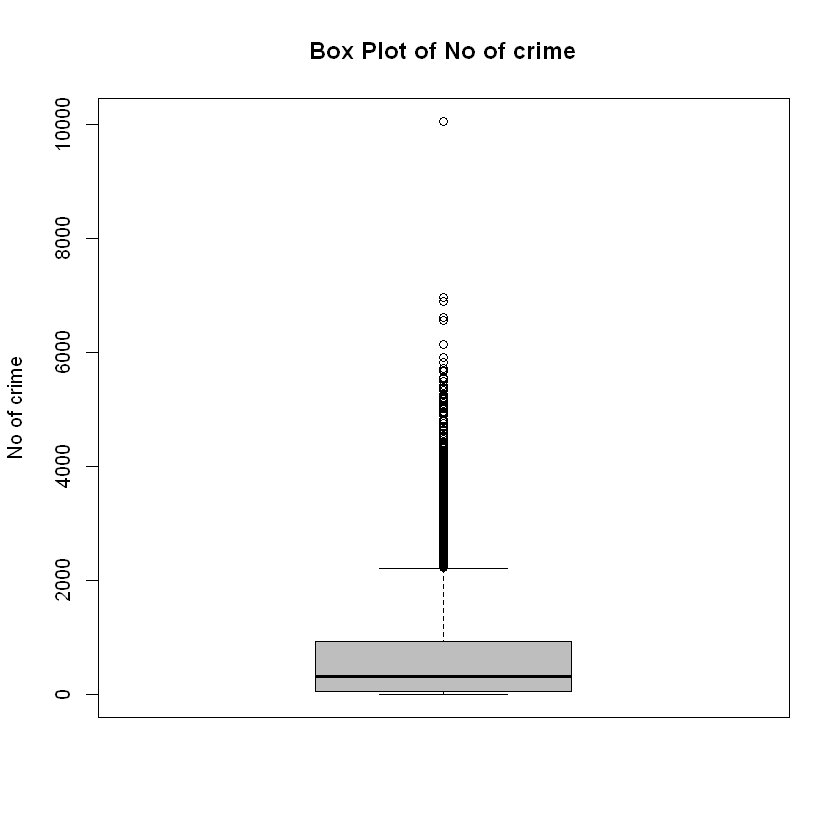

In [32]:
boxplot(all_cells$No_of_crime, main = "Box Plot of No of crime", ylab = "No of crime", col = "grey")

The boxplot provides a quick overview of the distribution of "No_of_crime" variable. We can see the central tendency of the data represented by the median line. The range of the central 50% of the data is indicated by the length of the box. And the outliers fall outside the whiskers and stand alone from the whole data.

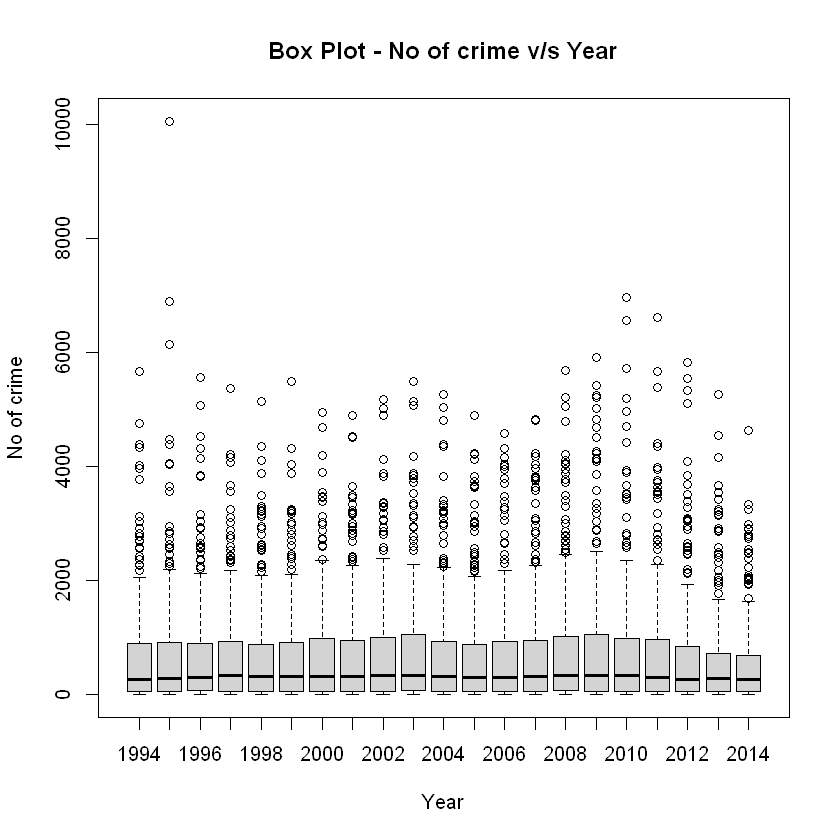

In [33]:
boxplot(No_of_crime ~ Year, data = all_cells, main = "Box Plot - No of crime v/s Year", ylab = "No of crime", xlab = "Year")

This grouped boxplot helps us to understand how the distribution of "No_of_crime" varies across different years. The main advantage is we can identify potential outliers for each year.

In [34]:
z.scores_No_of_crime <- all_cells$No_of_crime %>% scale()
z.scores_No_of_crime %>% summary()

       V1         
 Min.   :-0.7213  
 1st Qu.:-0.6582  
 Median :-0.3959  
 Mean   : 0.0000  
 3rd Qu.: 0.2363  
 Max.   : 9.6896  

The first quartile, indicated by -0.6582. This means that approximately 25% of the data points have z-scores below -0.6582. The maximum z-score is approximately 9.6896, indicating that the highest standardized value in our dataset is almost 9.7 standard deviations above the mean. 

In [35]:
length(which(abs(z.scores_No_of_crime)>3)) #there are 154 outliers in the data

[1] 154

In [36]:
# loop that iteratively removes outliers from the all_cells dataset for the "No_of_crime" variable

for(i in 1:5){
# remove outliers
all_cells <- all_cells[- which(abs(z.scores_No_of_crime)>3), ]
}

In [37]:
#Check again
z.scores_No_of_crime <- all_cells$No_of_crime %>% scale()
z.scores_No_of_crime %>% summary()

       V1         
 Min.   :-0.7965  
 1st Qu.:-0.7207  
 Median :-0.4136  
 Mean   : 0.0000  
 3rd Qu.: 0.3333  
 Max.   : 3.9727  

The maximum z-score is approximately 3.9727, indicating that the highest standardized value in our dataset is approximately 3.9 standard deviations above the mean. This looks better than the previous z-score, indicating effect of outliers is reduced.

In [38]:
length(which(abs(z.scores_No_of_crime)>3)) #no. of outliers are reduced

[1] 134

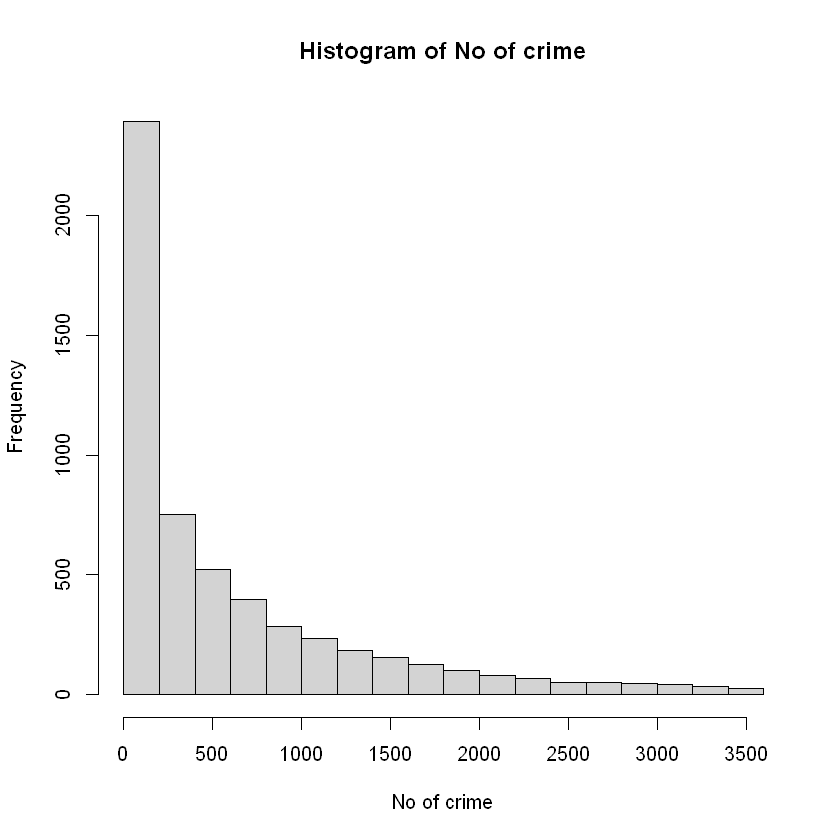

In [39]:
hist(all_cells$No_of_crime, main = "Histogram of No of crime", xlab = "No of crime") #right skewed

Following are the variables considered for the analysis: the tidy version of `crime dataset` has around 4 variables with 5538 observations.

- `Offences` : The Australian and New Zealand Standard Offence Classification (ANZSOC) is used to categorise offences into 16 divisions.
- `Location` : Where is the crime carried out? - New Zealand is divided into 12 districts, each representing a distinct geographic area.
- `No_of_crime` : Crime number with respect to location, offences and year.
- `Year` : Timeframe ranging over 1994 to 2014.

In [40]:
str(all_cells[, c("No_of_crime", "Location", "Offences", "Year")])

tibble [5,538 × 4] (S3: tbl_df/tbl/data.frame)
 $ No_of_crime: num [1:5538] 4 1114 68 19 214 ...
 $ Location   : chr [1:5538] "Northland District" "Northland District" "Northland District" "Northland District" ...
 $ Offences   : chr [1:5538] "Homicide and related offences" "Acts intended to cause injury" "Sexual assault and related offences" "Dangerous or negligent acts endangering persons" ...
 $ Year       : int [1:5538] 1994 1994 1994 1994 1994 1994 1994 1994 1994 1994 ...


**Save the dataset to csv file.**

In [41]:
write_csv(all_cells, "Crime-tidy.csv")

### Dataset 2 - Population data
#### **Step 1: Import dataset**

In [42]:
population_data <- read_excel("Population data.xlsx")
head(population_data)

New names:
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`
• `` -> `...16`
• `` -> `...17`


"Estimated Resident Population for Regional Council Areas, at 30 June (1996+) (Annual-Jun)",...2,...3,...4,...5,...6,...7,...8,...9,...10,...11,...12,...13,...14,...15,...16,...17
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,Northland Region,Auckland Region,Waikato Region,Bay of Plenty Region,Gisborne Region,Hawke's Bay Region,Taranaki Region,Manawatu-Wanganui Region,Wellington Region,Tasman Region,Nelson Region,Marlborough Region,West Coast Region,Canterbury Region,Otago Region,Southland Region
1996,140700,1115800,358800,230600,47200,146600,109000,234500,426900,38800,41200,39200,33200,480400,189300,99000
1997,142100,1146700,362700,235400,46900,147400,108600,233800,431200,39400,41700,39600,32900,485400,189300,97400
1998,143300,1169000,365600,239600,46600,147600,108100,232500,433900,40200,42000,40000,32500,488800,188900,95500
1999,143800,1184800,366900,242500,46400,147300,107300,231200,435800,40800,42300,40300,31900,491100,188200,93700
2000,144400,1201500,368100,245200,46100,147300,106500,229900,437500,41600,42600,40500,31400,493600,188100,92700


In [43]:
# Inspect the data
glimpse(population_data)

Rows: 59
Columns: 17
$ `Estimated Resident Population for Regional Council Areas, at 30 June (1996+) (Annual-Jun)` <chr> …
$ ...2                                                                                        <chr> …
$ ...3                                                                                        <chr> …
$ ...4                                                                                        <chr> …
$ ...5                                                                                        <chr> …
$ ...6                                                                                        <chr> …
$ ...7                                                                                        <chr> …
$ ...8                                                                                        <chr> …
$ ...9                                                                                        <chr> …
$ ...10                                                      

The output we got is a tibble with new names for its columns, such as ...2, ...3, ...4, and so on. This happens due to metadata in the Excel file named "Population data.xlsx". This is not in a tabular format. The tibble that we got has 59 rows and 17 columns.

In [44]:
population_data <- read_excel("Population data.xlsx", skip=1)
# Inspect the data
glimpse(population_data)

New names:
• `` -> `...1`


Rows: 58
Columns: 17
$ ...1                       <chr> "1996", "1997", "1998", "1999", "2000", "20…
$ `Northland Region`         <dbl> 140700, 142100, 143300, 143800, 144400, 144…
$ `Auckland Region`          <dbl> 1115800, 1146700, 1169000, 1184800, 1201500…
$ `Waikato Region`           <dbl> 358800, 362700, 365600, 366900, 368100, 368…
$ `Bay of Plenty Region`     <dbl> 230600, 235400, 239600, 242500, 245200, 246…
$ `Gisborne Region`          <dbl> 47200, 46900, 46600, 46400, 46100, 45500, 4…
$ `Hawke's Bay Region`       <dbl> 146600, 147400, 147600, 147300, 147300, 147…
$ `Taranaki Region`          <dbl> 109000, 108600, 108100, 107300, 106500, 105…
$ `Manawatu-Wanganui Region` <dbl> 234500, 233800, 232500, 231200, 229900, 227…
$ `Wellington Region`        <dbl> 426900, 431200, 433900, 435800, 437500, 440…
$ `Tasman Region`            <dbl> 38800, 39400, 40200, 40800, 41600, 42400, 4…
$ `Nelson Region`            <dbl> 41200, 41700, 42000, 42300, 42600, 42900, 4…
$ `Marlborough Regi

The tibble thus obtained has following characterstics:

1. It has 58 rows and 17 columns.
2. The new names for the columns are represented by ...1, `Northland Region`, `Auckland Region` and so on.

#### **Step 2: Understand the data.**

Have a look at dimensions of data. population_data has 58 rows and 17 columns.

In [45]:
dim(population_data)

[1] 58 17

In [46]:
names(population_data) # view column names

[1] "...1"                     "Northland Region"        
 [3] "Auckland Region"          "Waikato Region"          
 [5] "Bay of Plenty Region"     "Gisborne Region"         
 [7] "Hawke's Bay Region"       "Taranaki Region"         
 [9] "Manawatu-Wanganui Region" "Wellington Region"       
[11] "Tasman Region"            "Nelson Region"           
[13] "Marlborough Region"       "West Coast Region"       
[15] "Canterbury Region"        "Otago Region"            
[17] "Southland Region"

In [47]:
colnames(population_data)[colnames(population_data) == "...1"] <- "Year"

# Now the column is renamed as "Year"

There are some additional information about our `population_data` in the last few columns of our excel file. We have to clean those as well.

In [48]:
tail(population_data)

Year,Northland Region,Auckland Region,Waikato Region,Bay of Plenty Region,Gisborne Region,Hawke's Bay Region,Taranaki Region,Manawatu-Wanganui Region,Wellington Region,Tasman Region,Nelson Region,Marlborough Region,West Coast Region,Canterbury Region,Otago Region,Southland Region
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
25 October 2022 10:45am,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Source: Statistics New Zealand,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Contact: Information Centre,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Telephone: 0508 525 525,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Email:info@stats.govt.nz,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [49]:
population_data <- population_data[1:27, ]

In [50]:
population_data # Now the dataframe has no metadata

Year,Northland Region,Auckland Region,Waikato Region,Bay of Plenty Region,Gisborne Region,Hawke's Bay Region,Taranaki Region,Manawatu-Wanganui Region,Wellington Region,Tasman Region,Nelson Region,Marlborough Region,West Coast Region,Canterbury Region,Otago Region,Southland Region
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1996,140700,1115800,358800,230600,47200,146600,109000,234500,426900,38800,41200,39200,33200,480400,189300,99000
1997,142100,1146700,362700,235400,46900,147400,108600,233800,431200,39400,41700,39600,32900,485400,189300,97400
1998,143300,1169000,365600,239600,46600,147600,108100,232500,433900,40200,42000,40000,32500,488800,188900,95500
1999,143800,1184800,366900,242500,46400,147300,107300,231200,435800,40800,42300,40300,31900,491100,188200,93700
2000,144400,1201500,368100,245200,46100,147300,106500,229900,437500,41600,42600,40500,31400,493600,188100,92700
2001,144400,1218300,368400,246900,45500,147300,105700,227500,440200,42400,42900,40700,31100,496700,188300,93300
2002,146000,1255800,373400,250700,45500,148500,105900,227800,445800,43200,43100,41200,31100,505100,191000,93500
2003,147900,1297600,379200,255000,45800,149400,106600,228700,452300,44100,43600,41800,31400,515500,193500,94100
2004,149500,1326000,384500,259100,45800,150400,106800,229200,457800,45000,44000,42500,31500,524800,195900,94100


Now after cleaning the additional information in the population_data, the dataframe has got 27 rows and 17 columns.

In [51]:
dim(population_data)

[1] 27 17

#### **Step 3: Have a look at the datatypes of columns.**

In [52]:
# Have a look  the datatypes of string
str(population_data)

tibble [27 × 17] (S3: tbl_df/tbl/data.frame)
 $ Year                    : chr [1:27] "1996" "1997" "1998" "1999" ...
 $ Northland Region        : num [1:27] 140700 142100 143300 143800 144400 ...
 $ Auckland Region         : num [1:27] 1115800 1146700 1169000 1184800 1201500 ...
 $ Waikato Region          : num [1:27] 358800 362700 365600 366900 368100 ...
 $ Bay of Plenty Region    : num [1:27] 230600 235400 239600 242500 245200 ...
 $ Gisborne Region         : num [1:27] 47200 46900 46600 46400 46100 45500 45500 45800 45800 45900 ...
 $ Hawke's Bay Region      : num [1:27] 146600 147400 147600 147300 147300 ...
 $ Taranaki Region         : num [1:27] 109000 108600 108100 107300 106500 ...
 $ Manawatu-Wanganui Region: num [1:27] 234500 233800 232500 231200 229900 ...
 $ Wellington Region       : num [1:27] 426900 431200 433900 435800 437500 ...
 $ Tasman Region           : num [1:27] 38800 39400 40200 40800 41600 42400 43200 44100 45000 45500 ...
 $ Nelson Region           : num [1:27

The datatype of the variable `Year` is character, we need to change that to numeric. For  this purpose we can use `parse_number` function.

In [53]:
options(warn = -1)
population_data = population_data %>%
    mutate(Year = parse_number(Year))

In [54]:
glimpse(population_data) #now the datatypes looks ok 

Rows: 27
Columns: 17
$ Year                       <dbl> 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2…
$ `Northland Region`         <dbl> 140700, 142100, 143300, 143800, 144400, 144…
$ `Auckland Region`          <dbl> 1115800, 1146700, 1169000, 1184800, 1201500…
$ `Waikato Region`           <dbl> 358800, 362700, 365600, 366900, 368100, 368…
$ `Bay of Plenty Region`     <dbl> 230600, 235400, 239600, 242500, 245200, 246…
$ `Gisborne Region`          <dbl> 47200, 46900, 46600, 46400, 46100, 45500, 4…
$ `Hawke's Bay Region`       <dbl> 146600, 147400, 147600, 147300, 147300, 147…
$ `Taranaki Region`          <dbl> 109000, 108600, 108100, 107300, 106500, 105…
$ `Manawatu-Wanganui Region` <dbl> 234500, 233800, 232500, 231200, 229900, 227…
$ `Wellington Region`        <dbl> 426900, 431200, 433900, 435800, 437500, 440…
$ `Tasman Region`            <dbl> 38800, 39400, 40200, 40800, 41600, 42400, 4…
$ `Nelson Region`            <dbl> 41200, 41700, 42000, 42300, 42600, 42900, 4…
$ `Marlborough Regi

#### **Step 4: Tidy & Manipulate Data**

The data is untidy because we have pivoted data. Unpivoting the dataframe is the first step. 

In [55]:
# Convert from wide to long format
population_data_long <- population_data %>%
  pivot_longer(cols = -Year, 
               names_to = "Region", 
               values_to = "Population")

# View the first few rows of the long format data
head(population_data_long, 10)

Year,Region,Population
<dbl>,<chr>,<dbl>
1996,Northland Region,140700
1996,Auckland Region,1115800
1996,Waikato Region,358800
1996,Bay of Plenty Region,230600
1996,Gisborne Region,47200
1996,Hawke's Bay Region,146600
1996,Taranaki Region,109000
1996,Manawatu-Wanganui Region,234500
1996,Wellington Region,426900


#### **Step 5: Learning about missing values in the dataframe**

There are no missing values in this `population data`.

In [56]:
na_count <-sapply(population_data_long, function(y) sum(length(which(is.na(y)))))
na_count <- data.frame(na_count)
print(na_count)

           na_count
Year              0
Region            0
Population        0


In [57]:
summary(population_data_long)

      Year         Region            Population     
 Min.   :1996   Length:432         Min.   :  31100  
 1st Qu.:2002   Class :character   1st Qu.:  49275  
 Median :2009   Mode  :character   Median : 156300  
 Mean   :2009                      Mean   : 271978  
 3rd Qu.:2016                      3rd Qu.: 350475  
 Max.   :2022                      Max.   :1714200  

#### **Step 6: Looking for outliers in the dataframe**

First, we visually assess the variable distributions using boxplots and identify outliers, which are only present in the `Population` variable because that is the only numerical variable we have other than `year`.

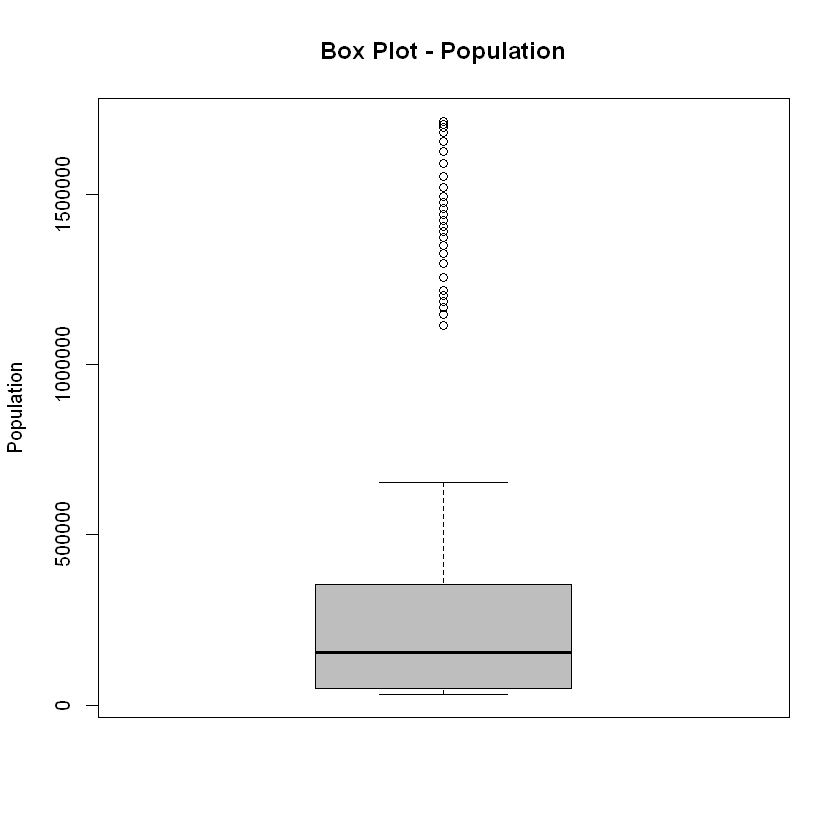

In [58]:
boxplot(population_data_long$Population, main = "Box Plot - Population", 
        ylab = "Population", col = "grey")

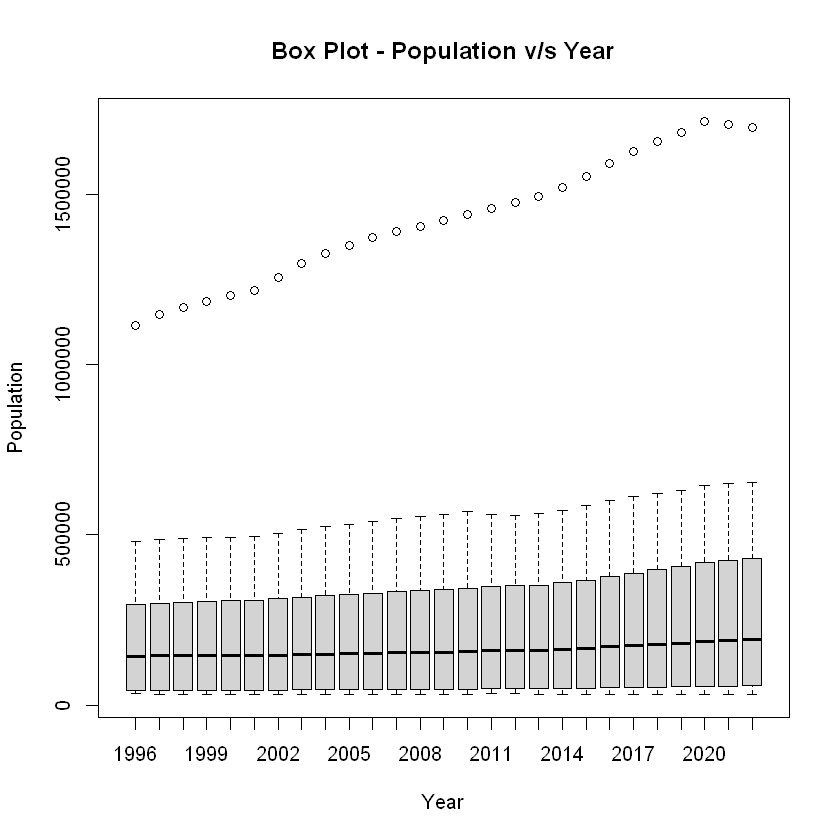

In [59]:
boxplot(Population ~ Year, data = population_data_long, main = "Box Plot - Population v/s Year", 
        ylab = "Population", xlab = "Year")

We can clearly see an upward trend in outliers from the grouped boxplot with respect to year. These are the outliers with respect to each year in our data.

In [60]:
z.scores_Population <- population_data_long$Population %>% scale()
z.scores_Population %>% summary()

       V1         
 Min.   :-0.7052  
 1st Qu.:-0.6520  
 Median :-0.3386  
 Mean   : 0.0000  
 3rd Qu.: 0.2298  
 Max.   : 4.2221  

The first quartile, indicated by -0.6520. This means that approximately 25% of the data points have z-scores below -0.6520. The maximum z-score is approximately 4.2221, indicating that the highest standardized value in our dataset is almost 4.2 standard deviations above the mean. 

In [61]:
length(which(abs(z.scores_Population)>3)) #there are 20 outliers in the data

[1] 20

In [62]:
# loop that iteratively removes outliers from the population_data_long dataset for the "Population" variable

for(i in 1:5){
# remove outliers
population_data_long <- population_data_long[- which(abs(z.scores_Population)>3), ]
}

In [63]:
#Check again
z.scores_Population <- population_data_long$Population %>% scale()

length(which(abs(z.scores_Population)>3)) # No. of outliers got reduced to 7

[1] 7

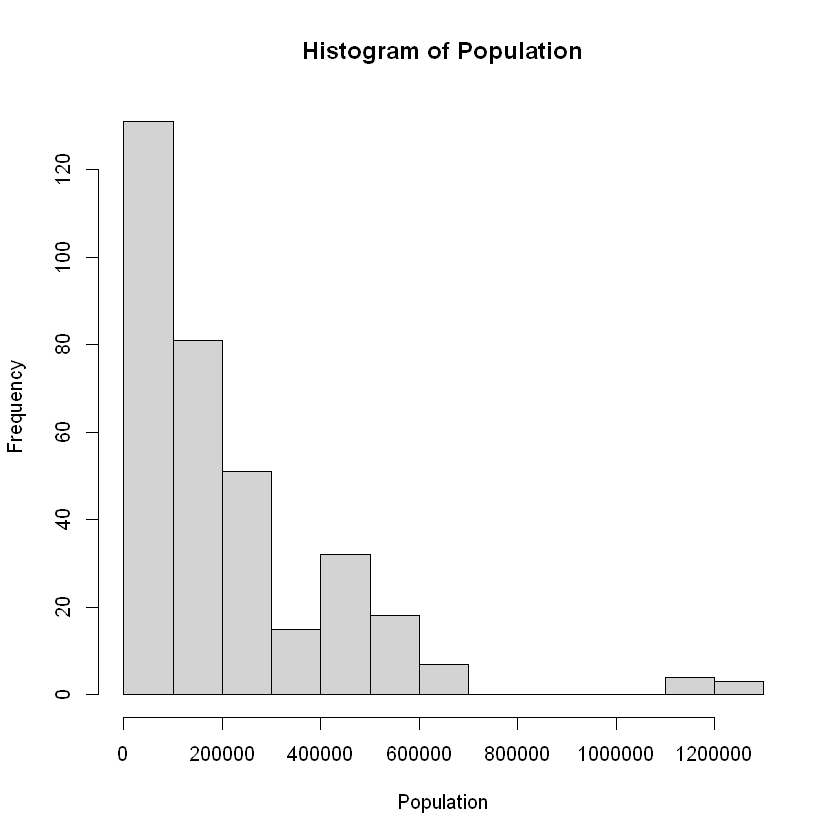

In [64]:
hist(population_data_long$Population, main = "Histogram of Population", xlab = "Population") #right skewed

Following are the variables considered for the analysis: the tidy version of `population dataset` has around 3 variables with 342 observations.

- `Population` : Estimated population wrt Region and Year.
- `Region` : Data corresponding to 16 regional council is included. 
- `Year` : Timeframe ranging over 1996 to 2023.

In [65]:
str(population_data_long[, c('Year','Region','Population')])

tibble [342 × 3] (S3: tbl_df/tbl/data.frame)
 $ Year      : num [1:342] 1996 1996 1996 1996 1996 ...
 $ Region    : chr [1:342] "Northland Region" "Auckland Region" "Waikato Region" "Bay of Plenty Region" ...
 $ Population: num [1:342] 140700 1115800 358800 230600 47200 ...


**Save the dataset to csv file.**

In [66]:
write_csv(population_data_long, "Population-tidy.csv")

### Dataset 3 - Justice data
#### **Step 1: Import dataset**

We have multiple sheets in the "Justice Data.xlsx" excel file, so specify  the sheet name appropriately while reading the dataset.

In [67]:
sheet_name <- "1a.Charges by offence-division"

justice_data <- read_excel("Justice Data.xlsx", sheet = sheet_name)

# Inspect the data
glimpse(justice_data)

New names:
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`
• `` -> `...16`
• `` -> `...17`
• `` -> `...18`
• `` -> `...19`
• `` -> `...20`
• `` -> `...21`
• `` -> `...22`
• `` -> `...23`
• `` -> `...24`
• `` -> `...25`
• `` -> `...26`
• `` -> `...27`
• `` -> `...28`
• `` -> `...29`
• `` -> `...30`
• `` -> `...31`
• `` -> `...32`
• `` -> `...33`
• `` -> `...34`
• `` -> `...35`
• `` -> `...36`
• `` -> `...37`
• `` -> `...38`
• `` -> `...39`
• `` -> `...40`
• `` -> `...41`
• `` -> `...42`
• `` -> `...43`
• `` -> `...44`


Rows: 39
Columns: 44
$ `Table 1a: Number and percentage of finalised charges, by offence type (ANZSOC division), 1980/1981 - 2022/2023` <chr> …
$ ...2                                                                                                             <chr> …
$ ...3                                                                                                             <chr> …
$ ...4                                                                                                             <chr> …
$ ...5                                                                                                             <chr> …
$ ...6                                                                                                             <chr> …
$ ...7                                                                                                             <chr> …
$ ...8                                                                                                             <ch

The output we got is a tibble with new names for its columns, such as ...2, ...3, ...4, and so on. This happens due to some additional information or metadata in our Excel file named "Justice Data.xlsx". This is not in a tabular format. The tibble that we got has following characterstics:
1. It has 39 rows and 44 columns.
2. The first row contains new names for the columns, which are represented by ...2, ...3, ...4, and so on
3. The actual data seems to start from the fifth row onward.

In [68]:
# So, ignore the first 5 rows
justice_data <- read_excel("Justice Data.xlsx", sheet = sheet_name, skip = 5)

# The data required for analysis is subsetted from the entire excel sheet using below code
f_col <- justice_data[, 1]
l_col <- justice_data[, (ncol(justice_data) - 7):ncol(justice_data)]

justice_data <- cbind(f_col, l_col)
justice_data

Offence type (ANZSOC division),2015/2016,2016/2017,2017/2018,2018/2019,2019/2020,2020/2021,2021/2022,2022/2023
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
01: Homicide and related offences,225,196,239,230,207,335,245,227
02: Acts intended to cause injury,24226,24886,24518,23675,23525,25704,20534,22611
03: Sexual assault and related offences,6016,4929,5789,5132,4827,5910,5708,6802
04: Dangerous or negligent acts endangering persons,11284,12036,12648,11903,10742,11101,8791,9954
"05: Abduction, harassment and other offences against the person",5160,5564,5216,5447,5681,6462,5846,6484
"06: Robbery, extortion and related offences",1351,1717,1795,1743,1401,1327,1163,1262
"07: Unlawful entry with intent/burglary, break and enter",7388,7448,6644,5915,6052,5893,5004,5725
08: Theft and related offences,23982,24774,24701,24183,24846,24918,20226,26060
"09: Fraud, deception and related offences",15467,15614,14254,12507,10840,11442,8620,8024


In [69]:
# Inspect the data
glimpse(justice_data)

Rows: 34
Columns: 9
$ `Offence type (ANZSOC division)` <chr> "01: Homicide and related offences", …
$ `2015/2016`                      <chr> "225", "24226", "6016", "11284", "516…
$ `2016/2017`                      <chr> "196", "24886", "4929", "12036", "556…
$ `2017/2018`                      <chr> "239", "24518", "5789", "12648", "521…
$ `2018/2019`                      <chr> "230", "23675", "5132", "11903", "544…
$ `2019/2020`                      <chr> "207", "23525", "4827", "10742", "568…
$ `2020/2021`                      <chr> "335", "25704", "5910", "11101", "646…
$ `2021/2022`                      <chr> "245", "20534", "5708", "8791", "5846…
$ `2022/2023`                      <chr> "227", "22611", "6802", "9954", "6484…


The tibble thus obtained has following characterstics:
1. It has 34 rows and 9 columns.
2. The new names for the columns are represented by `Offence type (ANZSOC division)`, `2015/2016` and so on.

#### **Step 2: Understand the data.**

Have a look at dimensions of data. `justice_data` has 34 rows and 9 columns.

In [70]:
dim(justice_data)

[1] 34  9

Rename the columns since most the column name starts with numbers, we should correct it based on the rules to be followed by a variable name. For cleaning the variable names, we use the R library called 'janitor'.

In [71]:
justice_data = justice_data %>% 
    clean_names()

names(justice_data)

[1] "offence_type_anzsoc_division" "x2015_2016"                  
[3] "x2016_2017"                   "x2017_2018"                  
[5] "x2018_2019"                   "x2019_2020"                  
[7] "x2020_2021"                   "x2021_2022"                  
[9] "x2022_2023"

Rename the column names of the data.

In [72]:
justice_data <- justice_data %>%
  select(Offences = offence_type_anzsoc_division, 
         y_2015  = x2015_2016,
         y_2016  = x2016_2017,
         y_2017  = x2017_2018,
         y_2018  = x2018_2019,
         y_2019  = x2019_2020,
         y_2020  = x2020_2021,
         y_2021  = x2021_2022,
         y_2022  = x2022_2023)

View renamed column names:

In [73]:
names(justice_data) #all column names looks ok now

[1] "Offences" "y_2015"   "y_2016"   "y_2017"   "y_2018"   "y_2019"   "y_2020"  
[8] "y_2021"   "y_2022"

There is an another table in this excel sheet folllowed by this table of data showing some percentages. That is not relevant for our case. So, next we ignore those unwanted data from our focus.

In [74]:
tail(justice_data, 3)

,Offences,y_2015,y_2016,y_2017,y_2018,y_2019,y_2020,y_2021,y_2022
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
32,"15: Offences against justice procedures, government security and government operations",0.19,0.19,0.19,0.21,0.21,0.19,0.17,0.17
33,16: Miscellaneous offences,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01
34,Total,1,1,1,1,1,1,1,1


In [75]:
justice_data <- justice_data[1:16, ]

In [76]:
dim(justice_data)

[1] 16  9

Now after removing the not relevant information in the justice_data, the dataframe has got 16 rows and 9 columns.

When we look into column called `Offences` we have different offences type as the values, but each of them is started with numbers thats not necessary in our analysis, it will be difficult when we try to join this data with some other datasets. So, clean that before proceeding further.

In [77]:
# Remove numbers and the colon in the beginning of Offences
justice_data$Offences <- sub("^\\d+: ", "", justice_data$Offences)
head(justice_data)

,Offences,y_2015,y_2016,y_2017,y_2018,y_2019,y_2020,y_2021,y_2022
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Homicide and related offences,225,196,239,230,207,335,245,227
2,Acts intended to cause injury,24226,24886,24518,23675,23525,25704,20534,22611
3,Sexual assault and related offences,6016,4929,5789,5132,4827,5910,5708,6802
4,Dangerous or negligent acts endangering persons,11284,12036,12648,11903,10742,11101,8791,9954
5,"Abduction, harassment and other offences against the person",5160,5564,5216,5447,5681,6462,5846,6484
6,"Robbery, extortion and related offences",1351,1717,1795,1743,1401,1327,1163,1262


#### **Step 3: Have a look at the datatypes of columns.** 

In [78]:
# Have a look  the datatypes
str(justice_data)

'data.frame':	16 obs. of  9 variables:
 $ Offences: chr  "Homicide and related offences" "Acts intended to cause injury" "Sexual assault and related offences" "Dangerous or negligent acts endangering persons" ...
 $ y_2015  : chr  "225" "24226" "6016" "11284" ...
 $ y_2016  : chr  "196" "24886" "4929" "12036" ...
 $ y_2017  : chr  "239" "24518" "5789" "12648" ...
 $ y_2018  : chr  "230" "23675" "5132" "11903" ...
 $ y_2019  : chr  "207" "23525" "4827" "10742" ...
 $ y_2020  : chr  "335" "25704" "5910" "11101" ...
 $ y_2021  : chr  "245" "20534" "5708" "8791" ...
 $ y_2022  : chr  "227" "22611" "6802" "9954" ...


Look into the numerical variables we have like `y_2015`, `y_2016` etc. We have to change their datatype, for this purpose we use the function `parse_number`.

In [79]:
#Changing the datatype of the coumns to dbl from chr
justice_data <- justice_data %>%
    mutate(y_2015 = parse_number(y_2015)) %>%
    mutate(y_2016 = parse_number(y_2016)) %>%
    mutate(y_2017 = parse_number(y_2017)) %>%
    mutate(y_2018 = parse_number(y_2018)) %>%
    mutate(y_2019 = parse_number(y_2019)) %>%
    mutate(y_2020 = parse_number(y_2020)) %>%
    mutate(y_2021 = parse_number(y_2021)) %>%
    mutate(y_2022 = parse_number(y_2022))

head(justice_data, 10)

,Offences,y_2015,y_2016,y_2017,y_2018,y_2019,y_2020,y_2021,y_2022
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Homicide and related offences,225,196,239,230,207,335,245,227
2,Acts intended to cause injury,24226,24886,24518,23675,23525,25704,20534,22611
3,Sexual assault and related offences,6016,4929,5789,5132,4827,5910,5708,6802
4,Dangerous or negligent acts endangering persons,11284,12036,12648,11903,10742,11101,8791,9954
5,"Abduction, harassment and other offences against the person",5160,5564,5216,5447,5681,6462,5846,6484
6,"Robbery, extortion and related offences",1351,1717,1795,1743,1401,1327,1163,1262
7,"Unlawful entry with intent/burglary, break and enter",7388,7448,6644,5915,6052,5893,5004,5725
8,Theft and related offences,23982,24774,24701,24183,24846,24918,20226,26060
9,"Fraud, deception and related offences",15467,15614,14254,12507,10840,11442,8620,8024


In [80]:
#Inspect the data
glimpse(justice_data)

Rows: 16
Columns: 9
$ Offences <chr> "Homicide and related offences", "Acts intended to cause inju…
$ y_2015   <dbl> 225, 24226, 6016, 11284, 5160, 1351, 7388, 23982, 15467, 1495…
$ y_2016   <dbl> 196, 24886, 4929, 12036, 5564, 1717, 7448, 24774, 15614, 1536…
$ y_2017   <dbl> 239, 24518, 5789, 12648, 5216, 1795, 6644, 24701, 14254, 1620…
$ y_2018   <dbl> 230, 23675, 5132, 11903, 5447, 1743, 5915, 24183, 12507, 1469…
$ y_2019   <dbl> 207, 23525, 4827, 10742, 5681, 1401, 6052, 24846, 10840, 1497…
$ y_2020   <dbl> 335, 25704, 5910, 11101, 6462, 1327, 5893, 24918, 11442, 1473…
$ y_2021   <dbl> 245, 20534, 5708, 8791, 5846, 1163, 5004, 20226, 8620, 12087,…
$ y_2022   <dbl> 227, 22611, 6802, 9954, 6484, 1262, 5725, 26060, 8024, 12788,…


Now, the datatypes of each column looks fine now.

#### **Step 4: Tidy & Manipulate Data**

The data is untidy because we have pivoted data. Unpivoting the dataframe is the first step.

In [81]:
# Convert from wide to long format
justice_data_long <- justice_data %>%
  pivot_longer(cols = -Offences , 
               names_to = "Year", 
               values_to = "No_of_crime")

# Extract the year using regular expressions
justice_data_long$Year <- as.integer(str_extract(justice_data_long$Year, "\\d+")) 

# View the first few rows of the long format data
head(justice_data_long, 10)

Offences,Year,No_of_crime
<chr>,<int>,<dbl>
Homicide and related offences,2015,225
Homicide and related offences,2016,196
Homicide and related offences,2017,239
Homicide and related offences,2018,230
Homicide and related offences,2019,207
Homicide and related offences,2020,335
Homicide and related offences,2021,245
Homicide and related offences,2022,227
Acts intended to cause injury,2015,24226


#### **Step 5: Learning about missing values in the dataframe**

There are no missing values in this `justice data`.

In [82]:
na_count <-sapply(justice_data_long, function(y) sum(length(which(is.na(y)))))
na_count <- data.frame(na_count)
print(na_count)

            na_count
Offences           0
Year               0
No_of_crime        0


In [83]:
summary(all_cells)

  No_of_crime       Location           Offences              Year     
 Min.   :   0.0   Length:5538        Length:5538        Min.   :1994  
 1st Qu.:  57.0   Class :character   Class :character   1st Qu.:1999  
 Median : 288.0   Mode  :character   Mode  :character   Median :2004  
 Mean   : 599.1                                         Mean   :2004  
 3rd Qu.: 849.8                                         3rd Qu.:2009  
 Max.   :3587.0                                         Max.   :2014  

#### **Step 6: Looking for outliers in the dataframe**

First, we visually assess the variable distributions using boxplots and identify outliers, which are only present in the `No_of_crime` variable because that is the only numerical variable we have other than `year`.

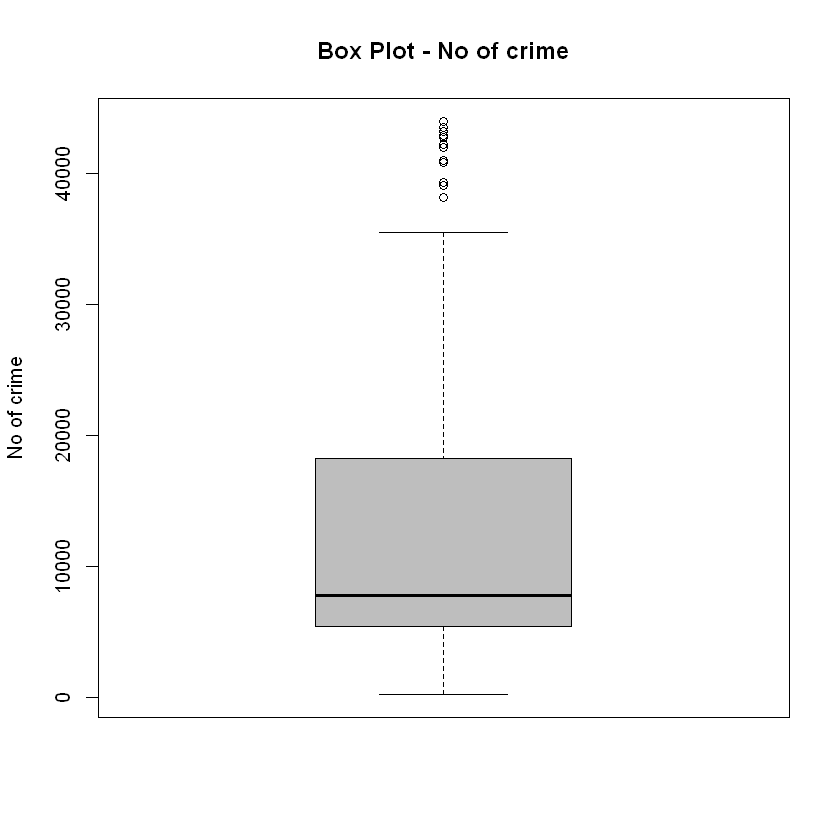

In [84]:
boxplot(justice_data_long$No_of_crime, main = "Box Plot - No of crime", 
        ylab = "No of crime", col = "grey")

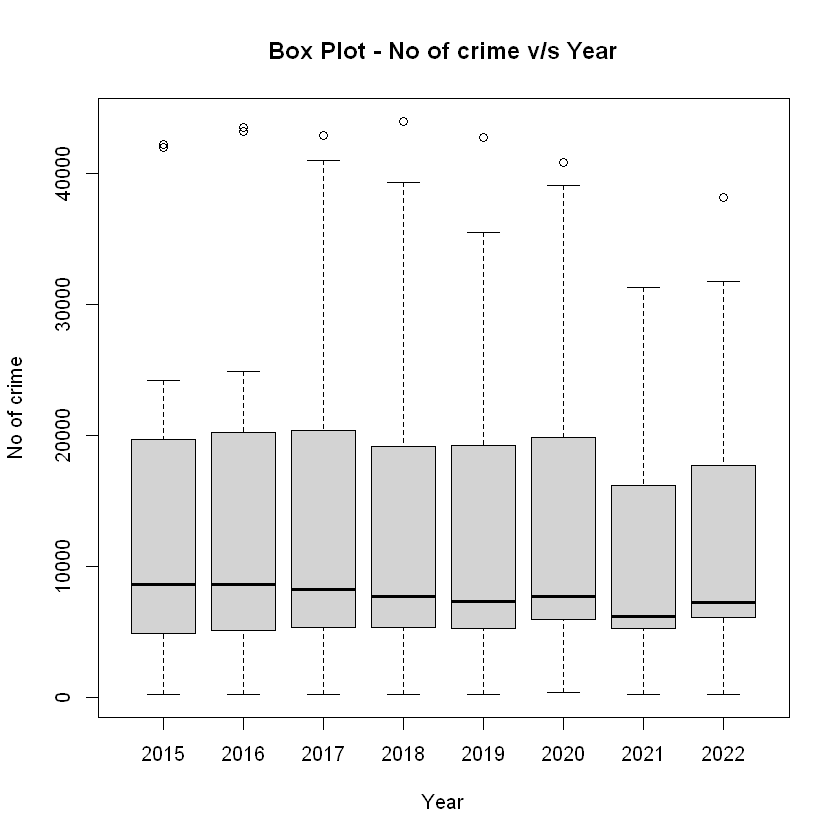

In [85]:
boxplot(No_of_crime ~ Year, data = justice_data_long, main = "Box Plot - No of crime v/s Year", 
        ylab = "No of crime", xlab = "Year")

We can clearly see the outliers from the grouped boxplot with respect to year. Those grey points are the outliers with respect to each year in our data.

In [86]:
z.scores_justice <- justice_data_long$No_of_crime %>% scale()
z.scores_justice %>% summary()

       V1         
 Min.   :-1.0513  
 1st Qu.:-0.6208  
 Median :-0.4247  
 Mean   : 0.0000  
 3rd Qu.: 0.3504  
 Max.   : 2.5570  

In [87]:
length(which(abs(z.scores_justice)>3)) #there are no outliers in the data

[1] 0

The first quartile, indicated by -0.6208. This means that approximately 25% of the data points have z-scores below -0.6208. The maximum z-score is approximately 2.5570, indicating that there are no outliers in `justice data`. 

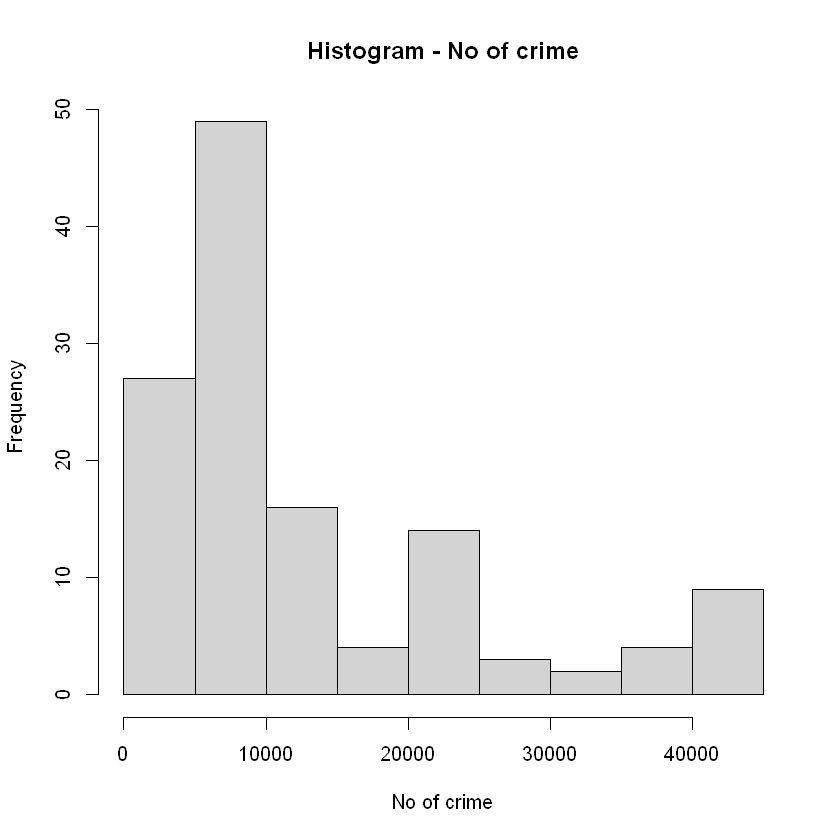

In [88]:
hist(justice_data_long$No_of_crime, main = "Histogram - No of crime", xlab = "No of crime") #right skewed

Following are the variables considered for the analysis: the tidy version of `justice dataset` has around 3 variables with 128 observations.

- `Offences` : The Australian and New Zealand Standard Offence Classification (ANZSOC) is used to categorise offences into 16 divisions.
- `No_of_crime` : Crime number with respect to offences and year.
- `Year` : Timeframe ranging over 2015 to 2022.

In [89]:
str(justice_data_long[, c('Offences','Year','No_of_crime')])

tibble [128 × 3] (S3: tbl_df/tbl/data.frame)
 $ Offences   : chr [1:128] "Homicide and related offences" "Homicide and related offences" "Homicide and related offences" "Homicide and related offences" ...
 $ Year       : int [1:128] 2015 2016 2017 2018 2019 2020 2021 2022 2015 2016 ...
 $ No_of_crime: num [1:128] 225 196 239 230 207 ...


**Save the dataset to csv file.**

In [90]:
write_csv(justice_data_long, "Justice-tidy.csv")

## 4. Exploratory Data Analysis

## **Crime Rate in New Zealand over years**

We want to create a dataset that includes years from 1994 to 2022, ensuring that all combinations of offences and years are represented. Following are key steps followed to get the trend over years:

1. Slice and group the `Crime Dataset` by "Offences" and "Years" variable.
2. Join two datasets: `Crime Dataset` and `Justice Dataset`.
3. The dataset obtained above(`final_dataset`) has variables 'Offences', 'Year' & 'No_of_crime'.
4. Group the `final_dataset` by "Year" variable.
5. Use `Population Dataset` and join with the dataset obtained in STEP 4.
6. Calculate `Crime Rate`. It is defined as the ratio of No. of Crime to Estimated Population.
7. Use ggplot to plot the trend over years.

In [91]:
# crime dataset stored in dataframe "all_cells"
# STEP 1
agg_data <- all_cells %>%
  group_by(Offences, Year) %>%
  summarise(Total_No_of_crime = sum(No_of_crime))

`summarise()` has grouped output by 'Offences'. You can override using the `.groups` argument.


### **Data Obtained after `left joining`**

In [92]:
# STEP 2 and 3
years <- seq(1994, 2022)
all_combinations <- expand.grid(Offences = unique(agg_data$Offences), Year = years)
agg_data <- agg_data %>%
  left_join(all_combinations, by = c("Offences", "Year")) %>%
  rename(No_of_crime = Total_No_of_crime)  # Rename the Total_No_of_crime column

head(agg_data, 10)

Offences,Year,No_of_crime
<chr>,<int>,<dbl>
"Abduction, harassment and other related offences against a person",1994,4628
"Abduction, harassment and other related offences against a person",1995,4817
"Abduction, harassment and other related offences against a person",1996,5347
"Abduction, harassment and other related offences against a person",1997,6384
"Abduction, harassment and other related offences against a person",1998,5392
"Abduction, harassment and other related offences against a person",1999,6267
"Abduction, harassment and other related offences against a person",2000,7333
"Abduction, harassment and other related offences against a person",2001,7581
"Abduction, harassment and other related offences against a person",2002,7431


### **Data Obtained after `right joining`**

In [93]:
justice_data <- justice_data_long %>%
  right_join(all_combinations, by = c("Offences", "Year"))
head(justice_data, 10)

Offences,Year,No_of_crime
<chr>,<int>,<dbl>
Homicide and related offences,2015,225
Homicide and related offences,2016,196
Homicide and related offences,2017,239
Homicide and related offences,2018,230
Homicide and related offences,2019,207
Homicide and related offences,2020,335
Homicide and related offences,2021,245
Homicide and related offences,2022,227
Acts intended to cause injury,2015,24226


### **Data Obtained after `binding rows`**

In [94]:
final_dataset <- bind_rows(agg_data, justice_data_long)
head(final_dataset, 10)

Offences,Year,No_of_crime
<chr>,<int>,<dbl>
"Abduction, harassment and other related offences against a person",1994,4628
"Abduction, harassment and other related offences against a person",1995,4817
"Abduction, harassment and other related offences against a person",1996,5347
"Abduction, harassment and other related offences against a person",1997,6384
"Abduction, harassment and other related offences against a person",1998,5392
"Abduction, harassment and other related offences against a person",1999,6267
"Abduction, harassment and other related offences against a person",2000,7333
"Abduction, harassment and other related offences against a person",2001,7581
"Abduction, harassment and other related offences against a person",2002,7431


In [95]:
# STEP 4
crime_data_1 <- final_dataset %>%
  group_by(Year) %>%
  summarise(Total_crime = sum(No_of_crime, na.rm = TRUE))

### **Data Obtained after `Merging` population data and crime data**

In [96]:
# STEP 5
crime_data_2 <- population_data_long %>%
  group_by(Year) %>%
  summarise(Population = sum(Population, na.rm = TRUE))

final_dataframe <- merge(crime_data_1, crime_data_2, by = "Year")
head(final_dataframe, 10)

,Year,Total_crime,Population
,<int>,<dbl>,<dbl>
1,1996,153552,3731200
2,1997,168691,3780500
3,1998,172955,3814100
4,1999,170561,3834300
5,2000,182751,3857000
6,2001,176859,3879600
7,2002,170244,3947600
8,2003,177434,1899500
9,2004,170000,2077200


### **Data Obtained after `creating a new calculated field`**

In [97]:
# Calculating crime rate
# STEP 6
final_dataframe <- final_dataframe %>%
  mutate(Crime_Rate = (Total_crime / Population) * 1000)

final_dataframe

Year,Total_crime,Population,Crime_Rate
<int>,<dbl>,<dbl>,<dbl>
1996,153552,3731200,41.15352
1997,168691,3780500,44.62135
1998,172955,3814100,45.34622
1999,170561,3834300,44.48296
2000,182751,3857000,47.38164
2001,176859,3879600,45.58692
2002,170244,3947600,43.12595
2003,177434,1899500,93.41090
2004,170000,2077200,81.84094


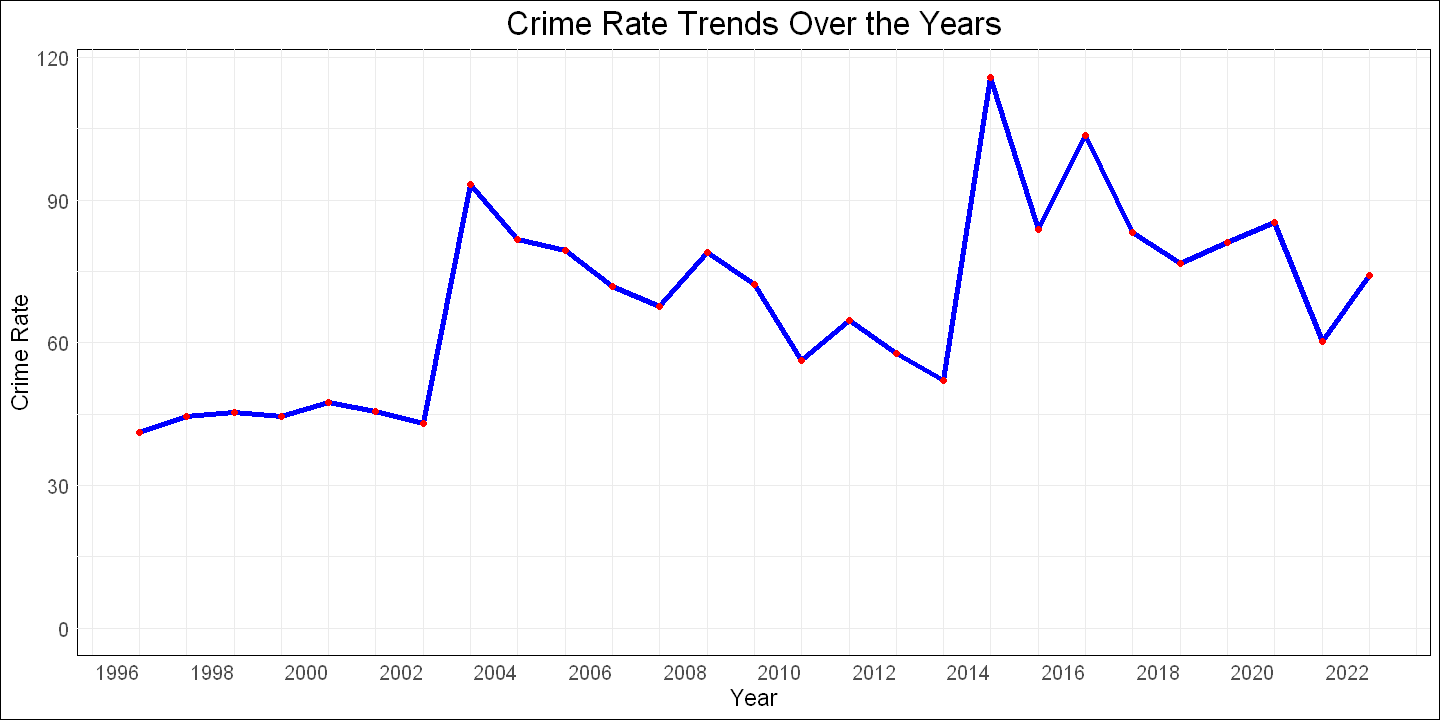

In [98]:
#STEP 7
# Set the dimensions for the graph
options(repr.plot.width = 12, repr.plot.height = 6)

#PLOT IT
plot1 = ggplot(data = final_dataframe, aes(x = Year, y = Crime_Rate)) +
  geom_line(color = "blue", size = 1.5) +  # Adjust color and line size
  geom_point(color = "red", size = 1.5) +   # Add points to the line
  labs(title = "Crime Rate Trends Over the Years",  # Change title
       x = "Year", y = "Crime Rate") +           # Change axis labels
  theme_minimal() +  # Apply a minimal theme
  theme(plot.title = element_text(size = 20, hjust = 0.5),
        axis.text = element_text(size = 12),  # Adjust axis label text size
        axis.title = element_text(size = 14)) +  # Adjust axis title text size) + # Center the title
  scale_x_continuous(breaks = seq(min(final_dataframe$Year), max(final_dataframe$Year), by = 2)) +  # Set the tick gap to 2
  ylim(0, max(final_dataframe$Crime_Rate)) +   # Set the y-axis range
  theme(axis.text.x = element_text(angle = 0, hjust = 1),
        panel.background = element_rect(fill = "white"),
        plot.background = element_rect(fill = "white")) +
  scale_fill_discrete(name = "")  # Empty legend title

plot1

In [99]:
ggsave("Crime_Trend_over_Years.png", plot1, width = 12, height = 6)

## **Crime Rate by Region**

We want to create a dataset that includes no of crime with respect to Region, to plot Crime Rate by Region. Following are key steps followed to get the region wise distribution:

1. We need to join `Crime Dataset` and `Population Dataset` by "Region" and "Year" variable. For that we need to do region mapping.
2. Join two datasets: `Crime Dataset` and `Population Dataset`.
3. The dataset obtained above(`merged_data`) has variables 'Offences', 'Year', 'Location', 'No_of_crime' and 'Population'.
4. Calculate `Crime Rate`. It is defined as the ratio of No. of Crime to Estimated Population.
5. Using ggplot plot Crime Rate by Region.

In `Crime Dataset` the variable 'Region' is defined based on 12 districts in New Zealand like "Northland District", "Waitemata District", "Auckland District", "Tasman District", "Canterbury District" and so on. Whereas, in `Population Datset` the variable 'Region' is defined based on 16 regional councils in New Zealand like "Northland Region", "Auckland Region", "Waikato Region", "Taranaki Region", "Canterbury Region" and so on. This region mapping is done in STEP 1 to prepare the Crime dataset ready for joining.

### **Data Obtained after `region mapping`**

In [100]:
# Define the mapping for Region names
# STEP 1
region_mapping <- c(
  "Northland District" = "Northland Region",
  "Waitemata District" = "Auckland Region",
  "Auckland District" = "Auckland Region",
  "Counties/Manukau District" = "Auckland Region",
  "Waikato District" = "Waikato Region",
  "Bay Of Plenty District" = "Bay of Plenty Region",
  "Hawkes Bay Area" = "Hawke's Bay Region",
  "Tairawhiti Area" = "Gisborne Region",
  "Manawatu Area" = "Manawatu-Wanganui Region",
  "Taranaki Area" = "Taranaki Region",
  "Whanganui Area" = "Manawatu-Wanganui Region",
  "Wellington District" = "Wellington Region",
  "Tasman District" = "Tasman Region",
  "Marlborough Area" = "Marlborough Region",
  "Nelson Bays Area" = "Nelson Region",
  "West Coast Area" = "West Coast Region",
  "Canterbury District" = "Canterbury Region",
  "Otago Coastal Area" = "Otago Region",
  "Otago Lakes Central Area" = "Otago Region",
  "Southland Area" = "Southland Region"
)

all_cells <- all_cells %>%
  mutate(Location = recode(Location, !!!region_mapping))

head(all_cells, 10)

No_of_crime,Location,Offences,Year
<dbl>,<chr>,<chr>,<int>
4,Northland Region,Homicide and related offences,1994
1114,Northland Region,Acts intended to cause injury,1994
68,Northland Region,Sexual assault and related offences,1994
19,Northland Region,Dangerous or negligent acts endangering persons,1994
214,Northland Region,"Abduction, harassment and other related offences against a person",1994
47,Northland Region,"Robbery, extortion and related offences",1994
698,Northland Region,"Unlawful entry with intent/burglary, break and enter",1994
1489,Northland Region,Theft and related offences,1994
385,Northland Region,"Fraud, deception and related offences",1994


### **Data Obtained after `left joining`**

In [101]:
#Joining crime and population data based on Region and Year
#STEP 2 and 3
merged_data <- all_cells %>%
  left_join(population_data_long, by = c("Year", "Location" = "Region")) %>% filter(Year >= 1996)

head(merged_data, 10)

No_of_crime,Location,Offences,Year,Population
<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,Northland Region,Homicide and related offences,1996,140700
1080,Northland Region,Acts intended to cause injury,1996,140700
72,Northland Region,Sexual assault and related offences,1996,140700
26,Northland Region,Dangerous or negligent acts endangering persons,1996,140700
241,Northland Region,"Abduction, harassment and other related offences against a person",1996,140700
43,Northland Region,"Robbery, extortion and related offences",1996,140700
591,Northland Region,"Unlawful entry with intent/burglary, break and enter",1996,140700
1133,Northland Region,Illicit drug offences,1996,140700
273,Northland Region,Prohibited and regulated weapons and explosives offences,1996,140700


### **Data Obtained after `creating a new calculated field`**

In [102]:
# Calculating crime rate (offences per 1000 people) for each region
#STEP 4
merged_data <- merged_data %>%
  mutate(Crime_Rate = (No_of_crime / Population) * 1000)  %>% 
  filter(Location != "Tasman Region") # Filter out Tasman Region

The Tasman Region in our dataset is analyzed as a standalone entity, even though it is derived by combining data from the three regions, namely:
1. Marlborough Region
2. Nelson Bays Region
3. West Coast Region

So, inorder to prevent redundancy, we filter out the Tasman Region.

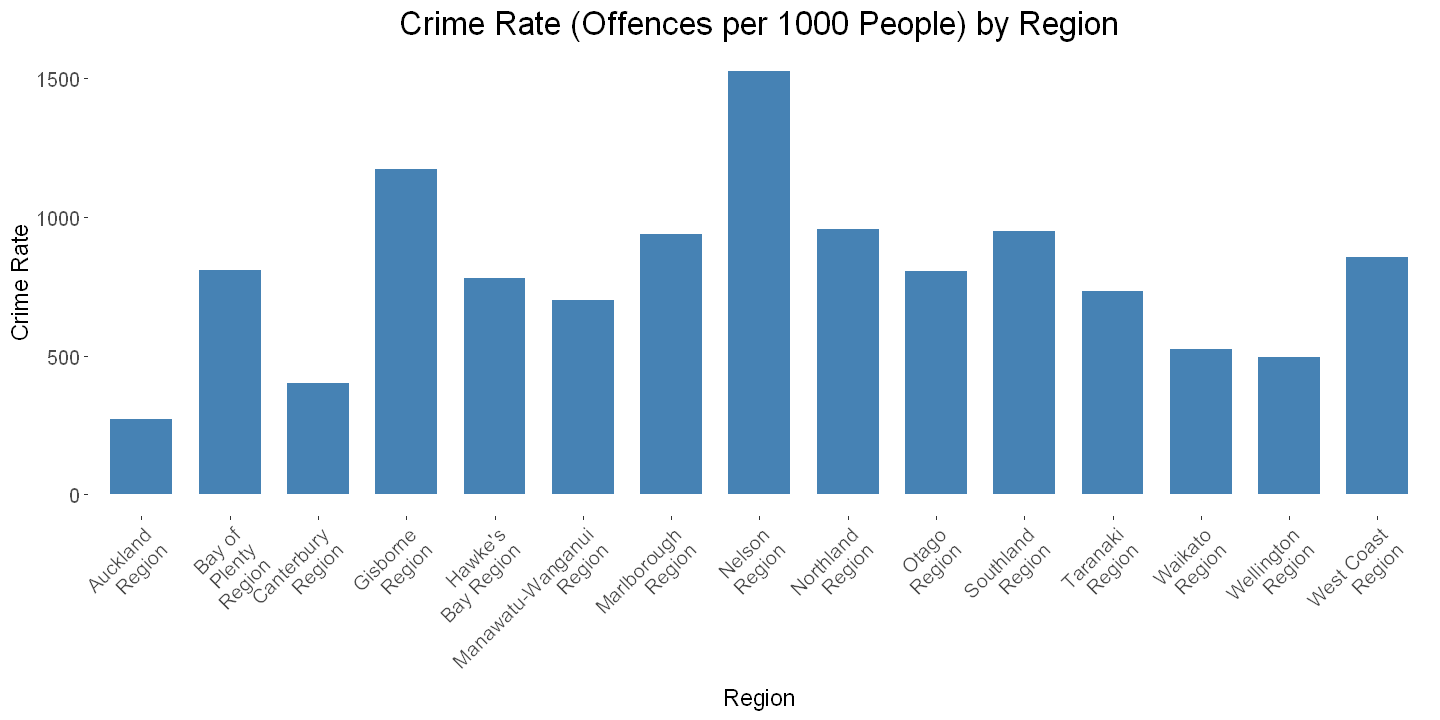

In [103]:
# Set the dimensions for the graph
options(repr.plot.width = 12, repr.plot.height = 6)

# STEP 5
plot2 = ggplot(merged_data, aes(x = reorder(Location, -Crime_Rate), y = Crime_Rate, fill = Location)) +
  geom_bar(stat = "identity", width = 0.7, fill = "steelblue") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.background = element_rect(fill = "white"),
        plot.background = element_rect(fill = "white")) +
  labs(title = "Crime Rate (Offences per 1000 People) by Region",
       x = "Region", y = "Crime Rate") +
  theme(plot.title = element_text(size = 20, hjust = 0.5),
        axis.text = element_text(size = 12),
        axis.title = element_text(size = 14)) +
  scale_fill_discrete(name = "Region") + 
  scale_x_discrete(labels = function(x) stringr::str_wrap(x, width = 10))

plot2

In [104]:
ggsave("Crime_Rate_by_Region.png", plot2, width = 12, height = 6)